# Trantando Dados

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dataset = pd.read_csv('result.csv')
dataset.head()

,modelo,marca,combustivel,cambio,direcao,cor,ano,quilometragem,potenciamotor,blindado,valor
0,LAND ROVER RANGE ROVER SPORT SE 3.0 4X4 TDV6/S...,LAND ROVER,Diesel,Automático,Hidráulica,Preto,2016,93000,3.0,0,279900.0
1,HYUNDAI HB20S PREMIUM 1.6 FLEX 16V AUT. 4P,HYUNDAI,Flex,Automático,Hidráulica,Branco,2016,78000,1.6,0,57900.0
2,GM - CHEVROLET MONZA SL/E SR 2.0,GM - CHEVROLET,Álcool,Manual,Mecânica,Prata,1989,1,2.0,0,3000.0
3,RENAULT SANDERO LIFE FLEX 1.0 12V 5P MEC.,RENAULT,Flex,Manual,Hidráulica,Prata,2021,35000,1.0,0,49499.0
4,GM - CHEVROLET SONIC SED. LTZ 1.6 16V FLEXPOWE...,GM - CHEVROLET,Flex,Automático,Elétrica,Branco,2014,39000,1.6,0,39000.0


In [26]:
type(dataset.iloc[0].valor)

numpy.float64

In [27]:
import seaborn as sns

<AxesSubplot:>

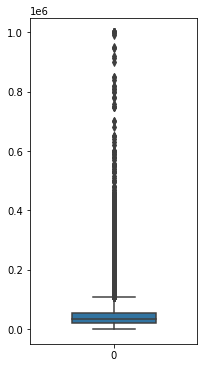

In [28]:
plt.figure(figsize=(3,6))
sns.boxplot(data=dataset['valor'], width=0.5)

In [29]:
modelos = dataset.groupby('modelo')['valor']

In [30]:
modelos = dataset.groupby('modelo')['valor']
q1 = modelos.quantile(.25)
q3 = modelos.quantile(.75)
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

In [31]:
dados_new = pd.DataFrame()

for tipo in modelos.groups.keys():
    eh_tipo = dataset['modelo'] == tipo
    eh_dentro_limite = (dataset['valor'] >= limite_inferior[tipo]) & (dataset['valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dataset[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])
    

In [32]:
quilometragem = dados_new.groupby('modelo')['quilometragem']
q1 = quilometragem.quantile(.25)
q3 = quilometragem.quantile(.75)
IIQ = q3 - q1
limite_inferior = q1 - 1.5 * IIQ
limite_superior = q3 + 1.5 * IIQ

quilometragem_new = pd.DataFrame()

for tipo in quilometragem.groups.keys():
    eh_tipo = dados_new['modelo'] == tipo
    eh_dentro_limite = (dados_new['quilometragem'] >= limite_inferior[tipo]) & (dados_new['quilometragem'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados_new[selecao]
    quilometragem_new = pd.concat([quilometragem_new, dados_selecao])
    

In [33]:
quilometragem_new.to_csv('temp.csv', index=False)

             Marca  counts
0   GM - CHEVROLET   16662
1  VW - VOLKSWAGEN   16575
2             FIAT   12701
3             FORD   10054
4          RENAULT    6267
5          HYUNDAI    6021
6            HONDA    5980
7           TOYOTA    3252
8          PEUGEOT    2386
9           NISSAN    2340
                                              Modelo  counts
0   GM - CHEVROLET CLASSIC LIFE/LS 1.0 VHC FLEXP. 4P     819
1               FORD KA 1.0 SE/SE PLUS TIVCT FLEX 5P     783
2        VW - VOLKSWAGEN FOX 1.0 MI TOTAL FLEX 8V 5P     691
3     HYUNDAI HB20 COMF./C.PLUS/C.STYLE 1.0 FLEX 12V     626
4                              VW - VOLKSWAGEN FUSCA     607
5  GM - CHEVROLET ONIX HATCH LT 1.0 8V FLEXPOWER ...     550
6               TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.     526
7       FORD FIESTA 1.0 8V FLEX/CLASS 1.0 8V FLEX 5P     486
8     HONDA CIVIC SEDAN LXS 1.8/1.8 FLEX 16V AUT. 4P     440
9  GM - CHEVROLET CELTA SPIRIT/ LT 1.0 MPFI 8V FL...     436


Text(0.5, 1.0, 'Frequencia por Modelo')

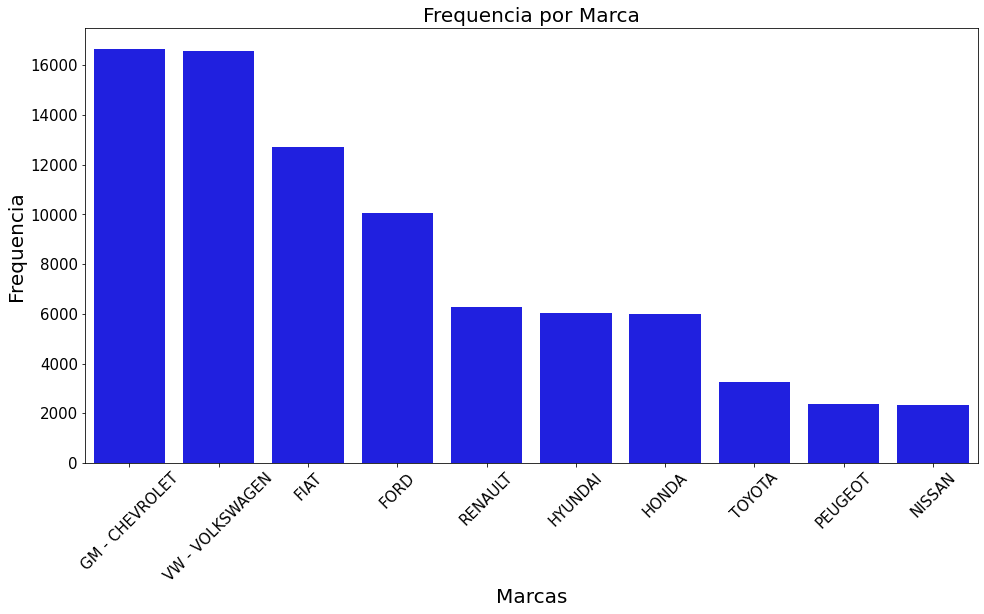

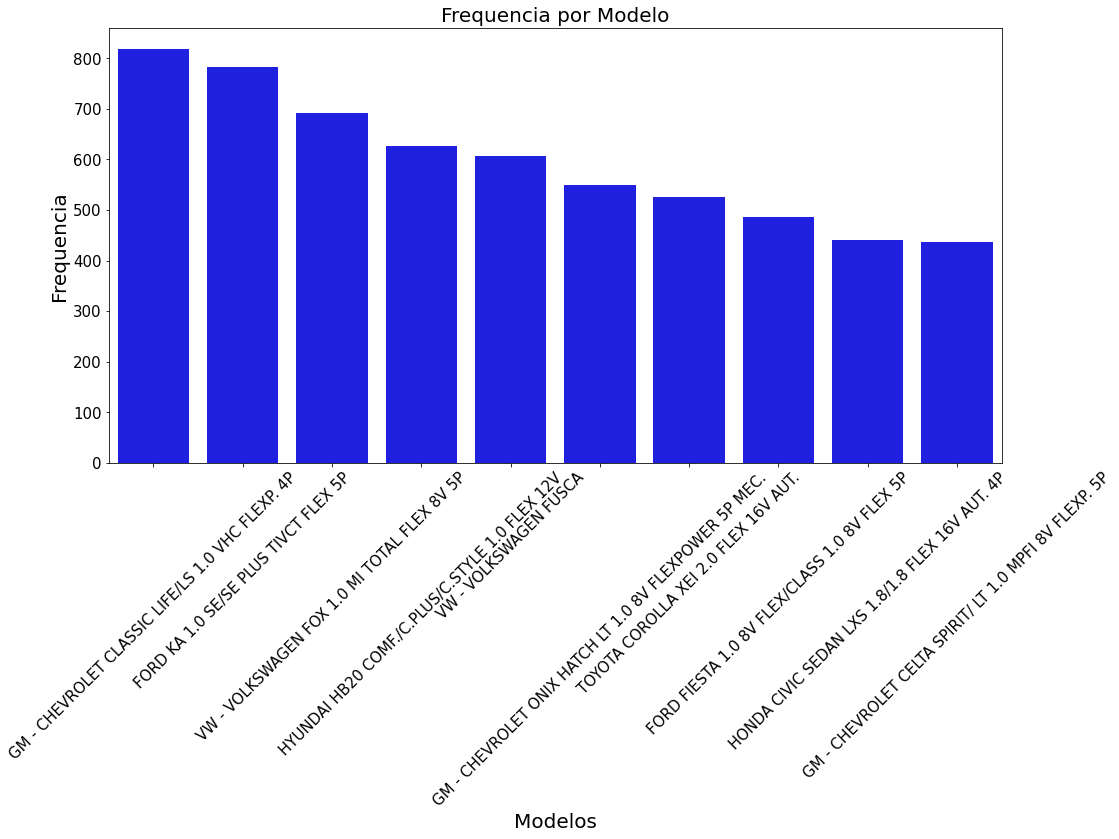

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dados = pd.read_csv('temp.csv')
dados.head()

plot = pd.DataFrame(dados.marca.value_counts().rename_axis(
    'Marca').reset_index(name='counts'))

print(plot.loc[:9])

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.barplot(data=plot.loc[:9],
            x='Marca', y="counts", color="blue")
plt.xticks(rotation=45)
plt.xlabel('Marcas', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Frequencia por Marca', fontsize=20)


plot = pd.DataFrame(dados.modelo.value_counts().rename_axis(
    'Modelo').reset_index(name='counts'))

print(plot.loc[:9])

plt.rc('legend', fontsize=15)
plt.rcParams['font.size'] = '15'

plt.figure(figsize=(16, 8))
sns.barplot(data=plot.loc[:9],
            x='Modelo', y="counts", color="blue")
plt.xticks(rotation=45)
plt.xlabel('Modelos', fontsize=20)
plt.ylabel('Frequencia', fontsize=20)
plt.title('Frequencia por Modelo', fontsize=20)


In [35]:
group_model = dados.groupby('modelo')
df_models = []
for modelo, data in group_model:    
    df_models.append(pd.DataFrame(data))

In [36]:
temp = []
for i in range(len(df_models)):
    df = df_models[i]
    temp.append(df.shape[0])

temp = np.asarray(temp)

In [37]:
for i in range(len(temp)):    
    # if temp[i]>170 and temp[i] < 180:
    #     print(i, " - ", temp[i])
    if temp[i]>500:
        print(i, " - ", temp[i])

1376  -  783
1672  -  819
1856  -  550
2246  -  626
3947  -  526
4177  -  691
4219  -  607


In [40]:
df_models[783].modelo.drop_duplicates()

8717    FIAT MAREA HLX 2.0 20V 4P
Name: modelo, dtype: object

In [41]:
df_models[783].to_csv('teste.csv', index=False)